    import numpy as np
    from tensorflow import keras
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from tensorflow.keras import layers
    from sklearn.metrics import confusion_matrix, classification_report

**Loading Dataset**

    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

    # understanding some properties of MNIST dataset
    print("x_train shape:", x_train.shape,'->', x_train.shape[0], "train samples")
    print("\nx_test shape:", x_test.shape,'->', x_test.shape[0], "test samples")

    print(55 * '-')

    unique_train = np.unique(y_train)
    unique_test = np.unique(y_test)
    print("Train labels: ", unique_train,'->',len(unique_train),'num_classes')
    print("\nTest labels: ", unique_test,'->',len(unique_test),'num_classes')
    Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
    32768/29515 [=================================] - 0s 0us/step
    40960/29515 [=========================================] - 0s 0us/step
    Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
    26427392/26421880 [==============================] - 0s 0us/step
    26435584/26421880 [==============================] - 0s 0us/step
    Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
    16384/5148 [===============================================================================================] - 0s 0us/step
    Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz
    4423680/4422102 [==============================] - 0s 0us/step
    4431872/4422102 [==============================] - 0s 0us/step
    x_train shape: (60000, 28, 28) -> 60000 train samples

    x_test shape: (10000, 28, 28) -> 10000 test samples
    -------------------------------------------------------
    Train labels:  [0 1 2 3 4 5 6 7 8 9] -> 10 num_classes

    Test labels:  [0 1 2 3 4 5 6 7 8 9] -> 10 num_classes

**Displaying Random set of Images from Training dataset**

    plt.figure(figsize=(5,5))
    for i in range(25):
        index = np.random.randint(low=0,high=x_train.shape[0])
        plt.subplot(5, 5, i + 1)
        image = x_train[index]
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
    plt.show()

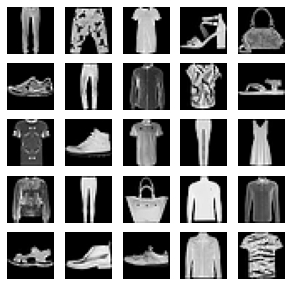

**Data Normalization**

    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

**Model / data parameters**

    num_classes = 10
    input_shape = (28, 28, 1)

    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

**Feature Engineering: convert class vectors to binary class matrices**

    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

**Modeling**

    def training_plots(history):

          plt.subplot(2,1, 1)
          history = history
          loss = history.history['loss']
          val_loss = history.history['val_loss']
          epochs = range(1, len(loss) + 1)
          plt.plot(epochs, loss, 'y', label='Training loss')
          plt.plot(epochs, val_loss, 'r', label='Validation loss')
          plt.title('Training and validation loss')
          plt.xlabel('Epochs')
          plt.ylabel('Loss')
          plt.legend()
          plt.show()

          plt.subplot(2,1, 2)
          acc = history.history['accuracy']
          val_acc = history.history['val_accuracy']
          plt.plot(epochs, acc, 'y', label='Training accuracy')
          plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
          plt.title('Training and validation accuracy')
          plt.xlabel('Epochs')
          plt.ylabel('accuracy')
          plt.legend()
          plt.show()
    # model-1: layers=2, keras_initializer='glorotnormal', optimizer='adam', learning_rate=0.01, batch_size=128, epochs=20, Dropout(0.5)

    model_1 = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model_1.summary()
    Model: "sequential"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                     
     max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
     )                                                               
                                                                     
     conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                     
     max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
     2D)                                                             
                                                                     
     flatten (Flatten)           (None, 1600)              0         
                                                                     
     dropout (Dropout)           (None, 1600)              0         
                                                                     
     dense (Dense)               (None, 10)                16010     
                                                                     
    =================================================================
    Total params: 34,826
    Trainable params: 34,826
    Non-trainable params: 0
    _________________________________________________________________
    batch_size = 128
    epochs = 20

    model_1.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

    history1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    Epoch 1/20
    422/422 [==============================] - 14s 6ms/step - loss: 0.5281 - accuracy: 0.8078 - val_loss: 0.3595 - val_accuracy: 0.8667
    Epoch 2/20
    422/422 [==============================] - 3s 7ms/step - loss: 0.4042 - accuracy: 0.8517 - val_loss: 0.3264 - val_accuracy: 0.8795
    Epoch 3/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3823 - accuracy: 0.8607 - val_loss: 0.3223 - val_accuracy: 0.8812
    Epoch 4/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3683 - accuracy: 0.8648 - val_loss: 0.3166 - val_accuracy: 0.8832
    Epoch 5/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3606 - accuracy: 0.8692 - val_loss: 0.3085 - val_accuracy: 0.8818
    Epoch 6/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3542 - accuracy: 0.8699 - val_loss: 0.3379 - val_accuracy: 0.8818
    Epoch 7/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3511 - accuracy: 0.8715 - val_loss: 0.2915 - val_accuracy: 0.8912
    Epoch 8/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3431 - accuracy: 0.8736 - val_loss: 0.2936 - val_accuracy: 0.8915
    Epoch 9/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3391 - accuracy: 0.8751 - val_loss: 0.3261 - val_accuracy: 0.8780
    Epoch 10/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3418 - accuracy: 0.8751 - val_loss: 0.2865 - val_accuracy: 0.8915
    Epoch 11/20
    422/422 [==============================] - 2s 6ms/step - loss: 0.3346 - accuracy: 0.8773 - val_loss: 0.3036 - val_accuracy: 0.8878
    Epoch 12/20
    422/422 [==============================] - 3s 8ms/step - loss: 0.3337 - accuracy: 0.8773 - val_loss: 0.3049 - val_accuracy: 0.8853
    Epoch 13/20
    422/422 [==============================] - 3s 7ms/step - loss: 0.3350 - accuracy: 0.8769 - val_loss: 0.3074 - val_accuracy: 0.8863
    Epoch 14/20
    422/422 [==============================] - 3s 6ms/step - loss: 0.3336 - accuracy: 0.8789 - val_loss: 0.2873 - val_accuracy: 0.8927
    Epoch 15/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3295 - accuracy: 0.8774 - val_loss: 0.2890 - val_accuracy: 0.8960
    Epoch 16/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3296 - accuracy: 0.8791 - val_loss: 0.2922 - val_accuracy: 0.8887
    Epoch 17/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3311 - accuracy: 0.8776 - val_loss: 0.2988 - val_accuracy: 0.8852
    Epoch 18/20
    422/422 [==============================] - 2s 6ms/step - loss: 0.3340 - accuracy: 0.8758 - val_loss: 0.3111 - val_accuracy: 0.8832
    Epoch 19/20
    422/422 [==============================] - 2s 5ms/step - loss: 0.3285 - accuracy: 0.8792 - val_loss: 0.3112 - val_accuracy: 0.8825
    Epoch 20/20
    422/422 [==============================] - 2s 6ms/step - loss: 0.3253 - accuracy: 0.8789 - val_loss: 0.3016 - val_accuracy: 0.8875
    score = model_1.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    Test loss: 0.33294928073883057
    Test accuracy: 0.882099986076355
    pred_test = np.argmax(model_1.predict(x_test),axis=1)
    array = confusion_matrix(np.argmax(y_test, axis=1), pred_test)

    print(array)

    print('*'*70)
    print(classification_report(np.argmax(y_test, axis=1), pred_test))
    [[819   0  19  20   3   1 130   0   8   0]
     [  3 962   0  25   3   0   5   0   2   0]
     [ 13   0 818   5  82   0  81   0   1   0]
     [ 21   0  12 907  34   0  24   0   2   0]
     [  4   0  86  21 780   0 106   0   3   0]
     [  0   0   0   0   0 977   0  18   0   5]
     [128   0 104  31  66   1 658   0  12   0]
     [  0   0   0   0   0   9   0 984   0   7]
     [  1   1   4   5   2   3   7   1 976   0]
     [  1   0   0   0   0  10   0  49   0 940]]
    **********************************************************************
                  precision    recall  f1-score   support

               0       0.83      0.82      0.82      1000
               1       1.00      0.96      0.98      1000
               2       0.78      0.82      0.80      1000
               3       0.89      0.91      0.90      1000
               4       0.80      0.78      0.79      1000
               5       0.98      0.98      0.98      1000
               6       0.65      0.66      0.65      1000
               7       0.94      0.98      0.96      1000
               8       0.97      0.98      0.97      1000
               9       0.99      0.94      0.96      1000

        accuracy                           0.88     10000
       macro avg       0.88      0.88      0.88     10000
    weighted avg       0.88      0.88      0.88     10000

    training_plots(history1)

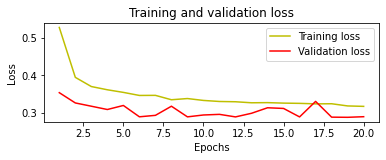



    # model-2: layers=3, keras_initializer='he_normal', optimizer='adadelta', learning_rate=0.001, batch_size=256, epochs=100, -
    #          BatchNormalization
    model_2 = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(16, kernel_size=(3, 3), activation="relu", kernel_initializer= 'he_normal'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer= 'he_normal'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer= 'he_normal'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model_2.summary()
    Model: "sequential_1"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                     
     max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
     2D)                                                             
                                                                     
     conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                     
     max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
     2D)                                                             
                                                                     
     conv2d_4 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                     
     max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)         0         
     2D)                                                             
                                                                     
     batch_normalization (BatchN  (None, 1, 1, 64)         256       
     ormalization)                                                   
                                                                     
     flatten_1 (Flatten)         (None, 64)                0         
                                                                     
     dense_1 (Dense)             (None, 10)                650       
                                                                     
    =================================================================
    Total params: 24,202
    Trainable params: 24,074
    Non-trainable params: 128
    _________________________________________________________________
    batch_size = 256
    epochs = 100

    model_2.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adadelta(learning_rate=0.001), metrics=["accuracy"])

    history2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    Epoch 1/100
    211/211 [==============================] - 2s 8ms/step - loss: 2.5139 - accuracy: 0.2157 - val_loss: 2.2949 - val_accuracy: 0.1920
    Epoch 2/100
    211/211 [==============================] - 1s 6ms/step - loss: 2.4118 - accuracy: 0.2385 - val_loss: 2.2773 - val_accuracy: 0.2468
    Epoch 3/100
    211/211 [==============================] - 1s 6ms/step - loss: 2.3034 - accuracy: 0.2601 - val_loss: 2.2104 - val_accuracy: 0.2860
    Epoch 4/100
    211/211 [==============================] - 1s 7ms/step - loss: 2.2018 - accuracy: 0.2808 - val_loss: 2.1284 - val_accuracy: 0.3070
    Epoch 5/100
    211/211 [==============================] - 2s 8ms/step - loss: 2.1091 - accuracy: 0.3002 - val_loss: 2.0432 - val_accuracy: 0.3240
    Epoch 6/100
    211/211 [==============================] - 2s 7ms/step - loss: 2.0249 - accuracy: 0.3182 - val_loss: 1.9628 - val_accuracy: 0.3422
    Epoch 7/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.9478 - accuracy: 0.3358 - val_loss: 1.8895 - val_accuracy: 0.3588
    Epoch 8/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.8775 - accuracy: 0.3526 - val_loss: 1.8233 - val_accuracy: 0.3775
    Epoch 9/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.8131 - accuracy: 0.3721 - val_loss: 1.7614 - val_accuracy: 0.3973
    Epoch 10/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.7542 - accuracy: 0.3902 - val_loss: 1.7047 - val_accuracy: 0.4128
    Epoch 11/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.7001 - accuracy: 0.4102 - val_loss: 1.6535 - val_accuracy: 0.4290
    Epoch 12/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.6504 - accuracy: 0.4294 - val_loss: 1.6069 - val_accuracy: 0.4462
    Epoch 13/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.6059 - accuracy: 0.4459 - val_loss: 1.5638 - val_accuracy: 0.4640
    Epoch 14/100
    211/211 [==============================] - 2s 7ms/step - loss: 1.5640 - accuracy: 0.4613 - val_loss: 1.5244 - val_accuracy: 0.4828
    Epoch 15/100
    211/211 [==============================] - 2s 9ms/step - loss: 1.5248 - accuracy: 0.4783 - val_loss: 1.4878 - val_accuracy: 0.4982
    Epoch 16/100
    211/211 [==============================] - 2s 9ms/step - loss: 1.4888 - accuracy: 0.4929 - val_loss: 1.4536 - val_accuracy: 0.5135
    Epoch 17/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.4558 - accuracy: 0.5041 - val_loss: 1.4230 - val_accuracy: 0.5280
    Epoch 18/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.4253 - accuracy: 0.5169 - val_loss: 1.3946 - val_accuracy: 0.5383
    Epoch 19/100
    211/211 [==============================] - 2s 8ms/step - loss: 1.3975 - accuracy: 0.5263 - val_loss: 1.3676 - val_accuracy: 0.5457
    Epoch 20/100
    211/211 [==============================] - 2s 7ms/step - loss: 1.3711 - accuracy: 0.5364 - val_loss: 1.3433 - val_accuracy: 0.5545
    Epoch 21/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.3476 - accuracy: 0.5462 - val_loss: 1.3210 - val_accuracy: 0.5637
    Epoch 22/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.3263 - accuracy: 0.5535 - val_loss: 1.3002 - val_accuracy: 0.5725
    Epoch 23/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.3046 - accuracy: 0.5625 - val_loss: 1.2807 - val_accuracy: 0.5807
    Epoch 24/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.2860 - accuracy: 0.5685 - val_loss: 1.2625 - val_accuracy: 0.5868
    Epoch 25/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.2671 - accuracy: 0.5757 - val_loss: 1.2450 - val_accuracy: 0.5937
    Epoch 26/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.2507 - accuracy: 0.5831 - val_loss: 1.2284 - val_accuracy: 0.5983
    Epoch 27/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.2346 - accuracy: 0.5876 - val_loss: 1.2128 - val_accuracy: 0.6018
    Epoch 28/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.2189 - accuracy: 0.5936 - val_loss: 1.1981 - val_accuracy: 0.6078
    Epoch 29/100
    211/211 [==============================] - 2s 7ms/step - loss: 1.2048 - accuracy: 0.6006 - val_loss: 1.1836 - val_accuracy: 0.6117
    Epoch 30/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.1906 - accuracy: 0.6050 - val_loss: 1.1704 - val_accuracy: 0.6175
    Epoch 31/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.1771 - accuracy: 0.6088 - val_loss: 1.1568 - val_accuracy: 0.6232
    Epoch 32/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.1640 - accuracy: 0.6151 - val_loss: 1.1446 - val_accuracy: 0.6272
    Epoch 33/100
    211/211 [==============================] - 2s 9ms/step - loss: 1.1520 - accuracy: 0.6194 - val_loss: 1.1322 - val_accuracy: 0.6335
    Epoch 34/100
    211/211 [==============================] - 2s 10ms/step - loss: 1.1395 - accuracy: 0.6228 - val_loss: 1.1211 - val_accuracy: 0.6367
    Epoch 35/100
    211/211 [==============================] - 2s 10ms/step - loss: 1.1284 - accuracy: 0.6281 - val_loss: 1.1090 - val_accuracy: 0.6407
    Epoch 36/100
    211/211 [==============================] - 2s 8ms/step - loss: 1.1172 - accuracy: 0.6305 - val_loss: 1.0984 - val_accuracy: 0.6430
    Epoch 37/100
    211/211 [==============================] - 1s 7ms/step - loss: 1.1063 - accuracy: 0.6342 - val_loss: 1.0882 - val_accuracy: 0.6455
    Epoch 38/100
    211/211 [==============================] - 2s 9ms/step - loss: 1.0965 - accuracy: 0.6375 - val_loss: 1.0775 - val_accuracy: 0.6488
    Epoch 39/100
    211/211 [==============================] - 2s 8ms/step - loss: 1.0861 - accuracy: 0.6411 - val_loss: 1.0678 - val_accuracy: 0.6537
    Epoch 40/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0759 - accuracy: 0.6455 - val_loss: 1.0585 - val_accuracy: 0.6580
    Epoch 41/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0678 - accuracy: 0.6471 - val_loss: 1.0489 - val_accuracy: 0.6613
    Epoch 42/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0585 - accuracy: 0.6507 - val_loss: 1.0400 - val_accuracy: 0.6647
    Epoch 43/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0498 - accuracy: 0.6532 - val_loss: 1.0312 - val_accuracy: 0.6680
    Epoch 44/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0407 - accuracy: 0.6556 - val_loss: 1.0229 - val_accuracy: 0.6703
    Epoch 45/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0328 - accuracy: 0.6583 - val_loss: 1.0146 - val_accuracy: 0.6717
    Epoch 46/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0251 - accuracy: 0.6608 - val_loss: 1.0065 - val_accuracy: 0.6730
    Epoch 47/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0174 - accuracy: 0.6620 - val_loss: 0.9991 - val_accuracy: 0.6753
    Epoch 48/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0096 - accuracy: 0.6652 - val_loss: 0.9915 - val_accuracy: 0.6768
    Epoch 49/100
    211/211 [==============================] - 1s 6ms/step - loss: 1.0034 - accuracy: 0.6679 - val_loss: 0.9843 - val_accuracy: 0.6790
    Epoch 50/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9950 - accuracy: 0.6700 - val_loss: 0.9775 - val_accuracy: 0.6808
    Epoch 51/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9885 - accuracy: 0.6722 - val_loss: 0.9708 - val_accuracy: 0.6813
    Epoch 52/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9820 - accuracy: 0.6737 - val_loss: 0.9637 - val_accuracy: 0.6828
    Epoch 53/100
    211/211 [==============================] - 2s 7ms/step - loss: 0.9752 - accuracy: 0.6766 - val_loss: 0.9572 - val_accuracy: 0.6847
    Epoch 54/100
    211/211 [==============================] - 1s 7ms/step - loss: 0.9694 - accuracy: 0.6783 - val_loss: 0.9510 - val_accuracy: 0.6862
    Epoch 55/100
    211/211 [==============================] - 2s 9ms/step - loss: 0.9637 - accuracy: 0.6794 - val_loss: 0.9449 - val_accuracy: 0.6887
    Epoch 56/100
    211/211 [==============================] - 2s 7ms/step - loss: 0.9573 - accuracy: 0.6821 - val_loss: 0.9388 - val_accuracy: 0.6903
    Epoch 57/100
    211/211 [==============================] - 2s 8ms/step - loss: 0.9515 - accuracy: 0.6835 - val_loss: 0.9333 - val_accuracy: 0.6918
    Epoch 58/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9462 - accuracy: 0.6853 - val_loss: 0.9272 - val_accuracy: 0.6942
    Epoch 59/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9404 - accuracy: 0.6880 - val_loss: 0.9222 - val_accuracy: 0.6965
    Epoch 60/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9347 - accuracy: 0.6895 - val_loss: 0.9164 - val_accuracy: 0.6980
    Epoch 61/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9294 - accuracy: 0.6900 - val_loss: 0.9112 - val_accuracy: 0.7000
    Epoch 62/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9253 - accuracy: 0.6926 - val_loss: 0.9063 - val_accuracy: 0.7033
    Epoch 63/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9201 - accuracy: 0.6941 - val_loss: 0.9013 - val_accuracy: 0.7063
    Epoch 64/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9149 - accuracy: 0.6955 - val_loss: 0.8963 - val_accuracy: 0.7078
    Epoch 65/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9106 - accuracy: 0.6972 - val_loss: 0.8922 - val_accuracy: 0.7080
    Epoch 66/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9053 - accuracy: 0.6992 - val_loss: 0.8873 - val_accuracy: 0.7098
    Epoch 67/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.9009 - accuracy: 0.7011 - val_loss: 0.8826 - val_accuracy: 0.7112
    Epoch 68/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8966 - accuracy: 0.7018 - val_loss: 0.8781 - val_accuracy: 0.7127
    Epoch 69/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8922 - accuracy: 0.7048 - val_loss: 0.8735 - val_accuracy: 0.7135
    Epoch 70/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8882 - accuracy: 0.7056 - val_loss: 0.8696 - val_accuracy: 0.7142
    Epoch 71/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8837 - accuracy: 0.7066 - val_loss: 0.8655 - val_accuracy: 0.7155
    Epoch 72/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8796 - accuracy: 0.7077 - val_loss: 0.8617 - val_accuracy: 0.7167
    Epoch 73/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8757 - accuracy: 0.7089 - val_loss: 0.8578 - val_accuracy: 0.7175
    Epoch 74/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8720 - accuracy: 0.7095 - val_loss: 0.8538 - val_accuracy: 0.7190
    Epoch 75/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8690 - accuracy: 0.7109 - val_loss: 0.8497 - val_accuracy: 0.7208
    Epoch 76/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8642 - accuracy: 0.7140 - val_loss: 0.8464 - val_accuracy: 0.7210
    Epoch 77/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8603 - accuracy: 0.7144 - val_loss: 0.8428 - val_accuracy: 0.7235
    Epoch 78/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8573 - accuracy: 0.7137 - val_loss: 0.8391 - val_accuracy: 0.7237
    Epoch 79/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8541 - accuracy: 0.7158 - val_loss: 0.8355 - val_accuracy: 0.7253
    Epoch 80/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8505 - accuracy: 0.7167 - val_loss: 0.8319 - val_accuracy: 0.7257
    Epoch 81/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8465 - accuracy: 0.7181 - val_loss: 0.8288 - val_accuracy: 0.7260
    Epoch 82/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8439 - accuracy: 0.7194 - val_loss: 0.8254 - val_accuracy: 0.7270
    Epoch 83/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8405 - accuracy: 0.7209 - val_loss: 0.8224 - val_accuracy: 0.7285
    Epoch 84/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8376 - accuracy: 0.7204 - val_loss: 0.8188 - val_accuracy: 0.7287
    Epoch 85/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8341 - accuracy: 0.7220 - val_loss: 0.8161 - val_accuracy: 0.7297
    Epoch 86/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8311 - accuracy: 0.7231 - val_loss: 0.8126 - val_accuracy: 0.7305
    Epoch 87/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8280 - accuracy: 0.7248 - val_loss: 0.8100 - val_accuracy: 0.7312
    Epoch 88/100
    211/211 [==============================] - 2s 8ms/step - loss: 0.8248 - accuracy: 0.7263 - val_loss: 0.8070 - val_accuracy: 0.7317
    Epoch 89/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8221 - accuracy: 0.7256 - val_loss: 0.8039 - val_accuracy: 0.7328
    Epoch 90/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8186 - accuracy: 0.7278 - val_loss: 0.8012 - val_accuracy: 0.7343
    Epoch 91/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8162 - accuracy: 0.7287 - val_loss: 0.7985 - val_accuracy: 0.7347
    Epoch 92/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8136 - accuracy: 0.7292 - val_loss: 0.7954 - val_accuracy: 0.7365
    Epoch 93/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8107 - accuracy: 0.7301 - val_loss: 0.7928 - val_accuracy: 0.7372
    Epoch 94/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8075 - accuracy: 0.7309 - val_loss: 0.7903 - val_accuracy: 0.7378
    Epoch 95/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8051 - accuracy: 0.7322 - val_loss: 0.7876 - val_accuracy: 0.7390
    Epoch 96/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8027 - accuracy: 0.7321 - val_loss: 0.7850 - val_accuracy: 0.7398
    Epoch 97/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.8003 - accuracy: 0.7341 - val_loss: 0.7825 - val_accuracy: 0.7405
    Epoch 98/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.7972 - accuracy: 0.7353 - val_loss: 0.7802 - val_accuracy: 0.7407
    Epoch 99/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.7953 - accuracy: 0.7358 - val_loss: 0.7775 - val_accuracy: 0.7420
    Epoch 100/100
    211/211 [==============================] - 1s 6ms/step - loss: 0.7924 - accuracy: 0.7366 - val_loss: 0.7751 - val_accuracy: 0.7427
    score = model_2.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    Test loss: 0.8034974932670593
    Test accuracy: 0.728600025177002
    pred_test = np.argmax(model_2.predict(x_test),axis=1)
    array = confusion_matrix(np.argmax(y_test, axis=1), pred_test)

    print(array)

    print('*'*70)
    print(classification_report(np.argmax(y_test, axis=1), pred_test))
    [[720  10  48  94  17   7  79   0  25   0]
     [  1 901  14  54   9   1  17   0   2   1]
     [ 14   0 493  14 184   1 284   0  10   0]
     [ 25  23  36 764  64   9  71   1   5   2]
     [  2   5 194  43 613   1 130   0  12   0]
     [  3   2   1  13   0 825   7 101   9  39]
     [183   5 198  79 162   1 339   0  33   0]
     [  0   0   0   1   0  65   1 834   5  94]
     [  5   1  20   5   7  34  47   6 872   3]
     [  0   0   0   7   1   6   0  59   2 925]]
    **********************************************************************
                  precision    recall  f1-score   support

               0       0.76      0.72      0.74      1000
               1       0.95      0.90      0.93      1000
               2       0.49      0.49      0.49      1000
               3       0.71      0.76      0.74      1000
               4       0.58      0.61      0.60      1000
               5       0.87      0.82      0.85      1000
               6       0.35      0.34      0.34      1000
               7       0.83      0.83      0.83      1000
               8       0.89      0.87      0.88      1000
               9       0.87      0.93      0.90      1000

        accuracy                           0.73     10000
       macro avg       0.73      0.73      0.73     10000
    weighted avg       0.73      0.73      0.73     10000

    training_plots(history2)





    # model-3:  layers=1, keras_initializer='LeakyReLU(alpha=0.01)', optimizer='SGD', learning_rate=0.001, batch_size=256, epochs=100, 
    #           kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), BatchNormalization
    from tensorflow.keras import regularizers

    model_3 = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(256, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01), kernel_initializer= 'he_normal',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model_3.summary()
    Model: "sequential_2"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     conv2d_5 (Conv2D)           (None, 26, 26, 256)       2560      
                                                                     
     max_pooling2d_5 (MaxPooling  (None, 13, 13, 256)      0         
     2D)                                                             
                                                                     
     batch_normalization_1 (Batc  (None, 13, 13, 256)      1024      
     hNormalization)                                                 
                                                                     
     flatten_2 (Flatten)         (None, 43264)             0         
                                                                     
     dense_2 (Dense)             (None, 10)                432650    
                                                                     
    =================================================================
    Total params: 436,234
    Trainable params: 435,722
    Non-trainable params: 512
    _________________________________________________________________
    batch_size = 256
    epochs = 100

    model_3.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])

    history3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    Epoch 1/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.6206 - accuracy: 0.8077 - val_loss: 0.6503 - val_accuracy: 0.8270
    Epoch 2/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.4469 - accuracy: 0.8673 - val_loss: 0.4661 - val_accuracy: 0.8635
    Epoch 3/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.4103 - accuracy: 0.8799 - val_loss: 0.4119 - val_accuracy: 0.8785
    Epoch 4/100
    211/211 [==============================] - 4s 21ms/step - loss: 0.3869 - accuracy: 0.8879 - val_loss: 0.3923 - val_accuracy: 0.8817
    Epoch 5/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.3704 - accuracy: 0.8938 - val_loss: 0.3814 - val_accuracy: 0.8897
    Epoch 6/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.3579 - accuracy: 0.8972 - val_loss: 0.3812 - val_accuracy: 0.8920
    Epoch 7/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.3483 - accuracy: 0.9011 - val_loss: 0.3669 - val_accuracy: 0.8932
    Epoch 8/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.3393 - accuracy: 0.9047 - val_loss: 0.3638 - val_accuracy: 0.8975
    Epoch 9/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.3314 - accuracy: 0.9073 - val_loss: 0.3578 - val_accuracy: 0.8987
    Epoch 10/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.3246 - accuracy: 0.9091 - val_loss: 0.3508 - val_accuracy: 0.9012
    Epoch 11/100
    211/211 [==============================] - 6s 27ms/step - loss: 0.3185 - accuracy: 0.9122 - val_loss: 0.3545 - val_accuracy: 0.8992
    Epoch 12/100
    211/211 [==============================] - 5s 26ms/step - loss: 0.3131 - accuracy: 0.9128 - val_loss: 0.3490 - val_accuracy: 0.9003
    Epoch 13/100
    211/211 [==============================] - 4s 21ms/step - loss: 0.3082 - accuracy: 0.9147 - val_loss: 0.3432 - val_accuracy: 0.8992
    Epoch 14/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.3032 - accuracy: 0.9174 - val_loss: 0.3437 - val_accuracy: 0.9012
    Epoch 15/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.2989 - accuracy: 0.9182 - val_loss: 0.3412 - val_accuracy: 0.9023
    Epoch 16/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2949 - accuracy: 0.9204 - val_loss: 0.3390 - val_accuracy: 0.9057
    Epoch 17/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2917 - accuracy: 0.9213 - val_loss: 0.3347 - val_accuracy: 0.9062
    Epoch 18/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2877 - accuracy: 0.9232 - val_loss: 0.3363 - val_accuracy: 0.9040
    Epoch 19/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2841 - accuracy: 0.9244 - val_loss: 0.3332 - val_accuracy: 0.9040
    Epoch 20/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.2816 - accuracy: 0.9250 - val_loss: 0.3301 - val_accuracy: 0.9075
    Epoch 21/100
    211/211 [==============================] - 5s 25ms/step - loss: 0.2783 - accuracy: 0.9263 - val_loss: 0.3313 - val_accuracy: 0.9053
    Epoch 22/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2757 - accuracy: 0.9273 - val_loss: 0.3252 - val_accuracy: 0.9092
    Epoch 23/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2729 - accuracy: 0.9285 - val_loss: 0.3242 - val_accuracy: 0.9097
    Epoch 24/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2701 - accuracy: 0.9294 - val_loss: 0.3256 - val_accuracy: 0.9075
    Epoch 25/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2677 - accuracy: 0.9303 - val_loss: 0.3247 - val_accuracy: 0.9115
    Epoch 26/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2654 - accuracy: 0.9310 - val_loss: 0.3233 - val_accuracy: 0.9112
    Epoch 27/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2630 - accuracy: 0.9314 - val_loss: 0.3205 - val_accuracy: 0.9097
    Epoch 28/100
    211/211 [==============================] - 5s 26ms/step - loss: 0.2611 - accuracy: 0.9327 - val_loss: 0.3235 - val_accuracy: 0.9098
    Epoch 29/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.2584 - accuracy: 0.9332 - val_loss: 0.3204 - val_accuracy: 0.9095
    Epoch 30/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.2566 - accuracy: 0.9339 - val_loss: 0.3178 - val_accuracy: 0.9105
    Epoch 31/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2546 - accuracy: 0.9342 - val_loss: 0.3180 - val_accuracy: 0.9117
    Epoch 32/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2532 - accuracy: 0.9353 - val_loss: 0.3173 - val_accuracy: 0.9113
    Epoch 33/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2509 - accuracy: 0.9356 - val_loss: 0.3174 - val_accuracy: 0.9147
    Epoch 34/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2495 - accuracy: 0.9364 - val_loss: 0.3160 - val_accuracy: 0.9135
    Epoch 35/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.2473 - accuracy: 0.9382 - val_loss: 0.3155 - val_accuracy: 0.9140
    Epoch 36/100
    211/211 [==============================] - 5s 23ms/step - loss: 0.2455 - accuracy: 0.9384 - val_loss: 0.3152 - val_accuracy: 0.9128
    Epoch 37/100
    211/211 [==============================] - 5s 24ms/step - loss: 0.2444 - accuracy: 0.9384 - val_loss: 0.3135 - val_accuracy: 0.9155
    Epoch 38/100
    211/211 [==============================] - 5s 24ms/step - loss: 0.2426 - accuracy: 0.9394 - val_loss: 0.3144 - val_accuracy: 0.9132
    Epoch 39/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2408 - accuracy: 0.9397 - val_loss: 0.3134 - val_accuracy: 0.9132
    Epoch 40/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2397 - accuracy: 0.9399 - val_loss: 0.3134 - val_accuracy: 0.9142
    Epoch 41/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2376 - accuracy: 0.9416 - val_loss: 0.3117 - val_accuracy: 0.9127
    Epoch 42/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2363 - accuracy: 0.9415 - val_loss: 0.3114 - val_accuracy: 0.9133
    Epoch 43/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2353 - accuracy: 0.9423 - val_loss: 0.3135 - val_accuracy: 0.9137
    Epoch 44/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2341 - accuracy: 0.9426 - val_loss: 0.3084 - val_accuracy: 0.9162
    Epoch 45/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2325 - accuracy: 0.9426 - val_loss: 0.3089 - val_accuracy: 0.9160
    Epoch 46/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2311 - accuracy: 0.9443 - val_loss: 0.3127 - val_accuracy: 0.9113
    Epoch 47/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2300 - accuracy: 0.9441 - val_loss: 0.3095 - val_accuracy: 0.9155
    Epoch 48/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2286 - accuracy: 0.9440 - val_loss: 0.3081 - val_accuracy: 0.9147
    Epoch 49/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2270 - accuracy: 0.9451 - val_loss: 0.3116 - val_accuracy: 0.9132
    Epoch 50/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2265 - accuracy: 0.9460 - val_loss: 0.3081 - val_accuracy: 0.9158
    Epoch 51/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2250 - accuracy: 0.9452 - val_loss: 0.3086 - val_accuracy: 0.9147
    Epoch 52/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2236 - accuracy: 0.9465 - val_loss: 0.3105 - val_accuracy: 0.9128
    Epoch 53/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2227 - accuracy: 0.9465 - val_loss: 0.3072 - val_accuracy: 0.9167
    Epoch 54/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2216 - accuracy: 0.9473 - val_loss: 0.3053 - val_accuracy: 0.9182
    Epoch 55/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2208 - accuracy: 0.9477 - val_loss: 0.3067 - val_accuracy: 0.9132
    Epoch 56/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2199 - accuracy: 0.9472 - val_loss: 0.3093 - val_accuracy: 0.9162
    Epoch 57/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2187 - accuracy: 0.9480 - val_loss: 0.3077 - val_accuracy: 0.9188
    Epoch 58/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2175 - accuracy: 0.9486 - val_loss: 0.3067 - val_accuracy: 0.9147
    Epoch 59/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2167 - accuracy: 0.9491 - val_loss: 0.3039 - val_accuracy: 0.9175
    Epoch 60/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2155 - accuracy: 0.9494 - val_loss: 0.3056 - val_accuracy: 0.9157
    Epoch 61/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2148 - accuracy: 0.9497 - val_loss: 0.3033 - val_accuracy: 0.9143
    Epoch 62/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2139 - accuracy: 0.9504 - val_loss: 0.3040 - val_accuracy: 0.9170
    Epoch 63/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2128 - accuracy: 0.9507 - val_loss: 0.3043 - val_accuracy: 0.9152
    Epoch 64/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2117 - accuracy: 0.9518 - val_loss: 0.3054 - val_accuracy: 0.9150
    Epoch 65/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2109 - accuracy: 0.9522 - val_loss: 0.3052 - val_accuracy: 0.9162
    Epoch 66/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2100 - accuracy: 0.9525 - val_loss: 0.3034 - val_accuracy: 0.9173
    Epoch 67/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2093 - accuracy: 0.9524 - val_loss: 0.3034 - val_accuracy: 0.9157
    Epoch 68/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2085 - accuracy: 0.9529 - val_loss: 0.3040 - val_accuracy: 0.9165
    Epoch 69/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2077 - accuracy: 0.9527 - val_loss: 0.3027 - val_accuracy: 0.9160
    Epoch 70/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2066 - accuracy: 0.9526 - val_loss: 0.3025 - val_accuracy: 0.9170
    Epoch 71/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2059 - accuracy: 0.9534 - val_loss: 0.3015 - val_accuracy: 0.9175
    Epoch 72/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2049 - accuracy: 0.9539 - val_loss: 0.3068 - val_accuracy: 0.9153
    Epoch 73/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2043 - accuracy: 0.9543 - val_loss: 0.3035 - val_accuracy: 0.9157
    Epoch 74/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2036 - accuracy: 0.9539 - val_loss: 0.3014 - val_accuracy: 0.9183
    Epoch 75/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2031 - accuracy: 0.9546 - val_loss: 0.3019 - val_accuracy: 0.9205
    Epoch 76/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2019 - accuracy: 0.9550 - val_loss: 0.3035 - val_accuracy: 0.9190
    Epoch 77/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.2010 - accuracy: 0.9557 - val_loss: 0.3038 - val_accuracy: 0.9198
    Epoch 78/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.2007 - accuracy: 0.9559 - val_loss: 0.3022 - val_accuracy: 0.9197
    Epoch 79/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.1993 - accuracy: 0.9561 - val_loss: 0.3013 - val_accuracy: 0.9175
    Epoch 80/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1991 - accuracy: 0.9558 - val_loss: 0.3013 - val_accuracy: 0.9150
    Epoch 81/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1985 - accuracy: 0.9565 - val_loss: 0.3000 - val_accuracy: 0.9195
    Epoch 82/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.1974 - accuracy: 0.9574 - val_loss: 0.3068 - val_accuracy: 0.9135
    Epoch 83/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1971 - accuracy: 0.9569 - val_loss: 0.3012 - val_accuracy: 0.9168
    Epoch 84/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1964 - accuracy: 0.9572 - val_loss: 0.3009 - val_accuracy: 0.9182
    Epoch 85/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1957 - accuracy: 0.9574 - val_loss: 0.3033 - val_accuracy: 0.9152
    Epoch 86/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1949 - accuracy: 0.9577 - val_loss: 0.2994 - val_accuracy: 0.9165
    Epoch 87/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1942 - accuracy: 0.9581 - val_loss: 0.3001 - val_accuracy: 0.9193
    Epoch 88/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1938 - accuracy: 0.9584 - val_loss: 0.2997 - val_accuracy: 0.9177
    Epoch 89/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1931 - accuracy: 0.9587 - val_loss: 0.3009 - val_accuracy: 0.9190
    Epoch 90/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1924 - accuracy: 0.9590 - val_loss: 0.3019 - val_accuracy: 0.9150
    Epoch 91/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1916 - accuracy: 0.9591 - val_loss: 0.3012 - val_accuracy: 0.9148
    Epoch 92/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1908 - accuracy: 0.9595 - val_loss: 0.3030 - val_accuracy: 0.9167
    Epoch 93/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1907 - accuracy: 0.9597 - val_loss: 0.3005 - val_accuracy: 0.9192
    Epoch 94/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1899 - accuracy: 0.9599 - val_loss: 0.3004 - val_accuracy: 0.9150
    Epoch 95/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.1895 - accuracy: 0.9601 - val_loss: 0.3010 - val_accuracy: 0.9200
    Epoch 96/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1888 - accuracy: 0.9609 - val_loss: 0.3005 - val_accuracy: 0.9178
    Epoch 97/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.1883 - accuracy: 0.9611 - val_loss: 0.3006 - val_accuracy: 0.9152
    Epoch 98/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1880 - accuracy: 0.9606 - val_loss: 0.2998 - val_accuracy: 0.9175
    Epoch 99/100
    211/211 [==============================] - 5s 21ms/step - loss: 0.1871 - accuracy: 0.9607 - val_loss: 0.3016 - val_accuracy: 0.9165
    Epoch 100/100
    211/211 [==============================] - 5s 22ms/step - loss: 0.1868 - accuracy: 0.9612 - val_loss: 0.3011 - val_accuracy: 0.9167
    score = model_3.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    Test loss: 0.31842201948165894
    Test accuracy: 0.9110000133514404
    pred_test = np.argmax(model_3.predict(x_test),axis=1)
    array = confusion_matrix(np.argmax(y_test, axis=1), pred_test)

    print(array)

    print('*'*70)
    print(classification_report(np.argmax(y_test, axis=1), pred_test))
    [[841   1  23  18   2   2 107   0   6   0]
     [  2 980   3  12   2   0   1   0   0   0]
     [ 15   1 873   7  50   0  52   0   2   0]
     [ 17   6  11 912  25   0  28   0   1   0]
     [  2   1  62  28 853   0  54   0   0   0]
     [  0   0   0   0   0 978   0  13   0   9]
     [ 86   1  55  27  62   0 760   0   9   0]
     [  0   0   0   0   0  11   0 972   0  17]
     [  2   0   1   7   2   2   3   5 977   1]
     [  0   0   0   0   0   8   1  27   0 964]]
    **********************************************************************
                  precision    recall  f1-score   support

               0       0.87      0.84      0.86      1000
               1       0.99      0.98      0.98      1000
               2       0.85      0.87      0.86      1000
               3       0.90      0.91      0.91      1000
               4       0.86      0.85      0.85      1000
               5       0.98      0.98      0.98      1000
               6       0.76      0.76      0.76      1000
               7       0.96      0.97      0.96      1000
               8       0.98      0.98      0.98      1000
               9       0.97      0.96      0.97      1000

        accuracy                           0.91     10000
       macro avg       0.91      0.91      0.91     10000
    weighted avg       0.91      0.91      0.91     10000

    training_plots(history3)

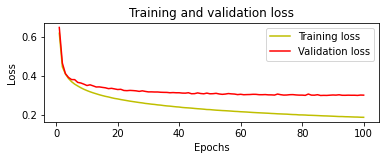

